In [1]:
pip install split-folders

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import splitfolders
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
!unzip data.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: data/paper/paper484.jpg  
  inflating: __MACOSX/data/paper/._paper484.jpg  
  inflating: data/paper/paper71.jpg  
  inflating: __MACOSX/data/paper/._paper71.jpg  
  inflating: data/paper/paper65.jpg  
  inflating: __MACOSX/data/paper/._paper65.jpg  
  inflating: data/paper/paper490.jpg  
  inflating: __MACOSX/data/paper/._paper490.jpg  
  inflating: data/paper/paper269.jpg  
  inflating: __MACOSX/data/paper/._paper269.jpg  
  inflating: data/paper/paper255.jpg  
  inflating: __MACOSX/data/paper/._paper255.jpg  
  inflating: data/paper/paper533.jpg  
  inflating: __MACOSX/data/paper/._paper533.jpg  
  inflating: data/paper/paper527.jpg  
  inflating: __MACOSX/data/paper/._paper527.jpg  
  inflating: data/paper/paper241.jpg  
  inflating: __MACOSX/data/paper/._paper241.jpg  
  inflating: data/paper/paper296.jpg  
  inflating: __MACOSX/data/paper/._paper296.jpg  
  inflating: data/paper/paper282.jpg  
  inflatin

In [3]:
splitfolders.ratio("data", output="split", seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 2527 files [00:02, 1145.65 files/s]


In [4]:
train_path="split/train"
val_path="split/val"
test_path="split/test"

In [5]:
x_train=[]
x_val=[]
x_test=[]

In [6]:
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img        
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_train.append(img_arr)

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_val.append(img_arr)
        
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        x_test.append(img_arr)

In [7]:
train_x=np.array(x_train)
val_x=np.array(x_val)
test_x=np.array(x_test)

In [ ]:
train_x=train_x/255.0
val_x=val_x/255.0
test_x=test_x/255.0

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_path, target_size = (384, 512),
                                                 batch_size = 43, class_mode = "categorical")

val_set = val_datagen.flow_from_directory(val_path, target_size = (384, 512),
                                            batch_size = 43, class_mode = "categorical")

test_set = test_datagen.flow_from_directory(test_path,target_size = (384, 512),
                                            batch_size = 43, class_mode = "categorical")

Found 2019 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Found 257 images belonging to 6 classes.


In [10]:
train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes

In [11]:
training_set.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [12]:
train_y.shape,test_y.shape,val_y.shape

((2019,), (257,), (251,))

In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(384, 512, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(6, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 384, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 192, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 256, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 96, 128, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 128, 32)       18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 64, 32)       0

In [15]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [20]:
early_stop=EarlyStopping(monitor="accuracy",
                         mode="auto",
                         verbose=1,
                         patience=10)

In [21]:
results = model.fit(train_x,
                    train_y,
                    validation_data=(val_x, val_y),
                    epochs=30,
                    callbacks=[early_stop],
                    batch_size=43,
                    verbose=1,
                    shuffle=True)

Epoch 1/30
47/47 [==============================] - 21s 439ms/step - loss: 0.9121 - accuracy: 0.6741 - val_loss: 2.7482 - val_accuracy: 0.2032
Epoch 2/30
47/47 [==============================] - 20s 431ms/step - loss: 0.8700 - accuracy: 0.6895 - val_loss: 3.0340 - val_accuracy: 0.2749
Epoch 3/30
47/47 [==============================] - 20s 430ms/step - loss: 0.8564 - accuracy: 0.7018 - val_loss: 2.9010 - val_accuracy: 0.3108
Epoch 4/30
47/47 [==============================] - 20s 430ms/step - loss: 0.8454 - accuracy: 0.7112 - val_loss: 3.5962 - val_accuracy: 0.2789
Epoch 5/30
47/47 [==============================] - 20s 430ms/step - loss: 0.7920 - accuracy: 0.7261 - val_loss: 3.2976 - val_accuracy: 0.3147
Epoch 6/30
47/47 [==============================] - 20s 430ms/step - loss: 0.7838 - accuracy: 0.7509 - val_loss: 3.0785 - val_accuracy: 0.3068
Epoch 7/30
47/47 [==============================] - 20s 431ms/step - loss: 0.6621 - accuracy: 0.7707 - val_loss: 3.4251 - val_accuracy: 0.2988

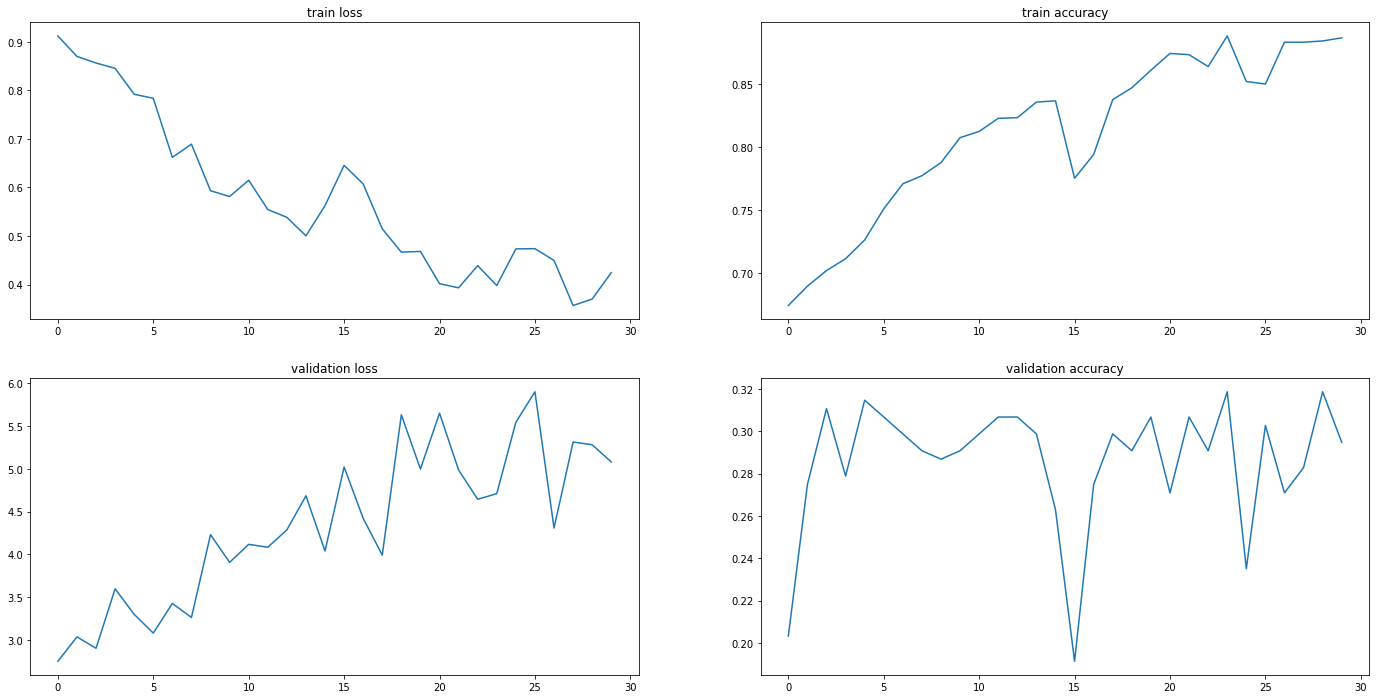

In [22]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(24,12))

ax[0][0].plot(results.history["loss"])
ax[0][1].plot(results.history["accuracy"])
ax[1][0].plot(results.history["val_loss"])
ax[1][1].plot(results.history["val_accuracy"])

ax[0][0].set_title("train loss")
ax[0][1].set_title("train accuracy")
ax[1][0].set_title("validation loss")
ax[1][1].set_title("validation accuracy")
plt.show()

In [23]:
model.evaluate(test_x, test_y, batch_size=43)

6/6 [==============================] - 2s 428ms/step - loss: 4.3716 - accuracy: 0.2179


[4.3716254234313965, 0.21789883077144623]

In [24]:
y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

In [25]:
print(confusion_matrix(y_pred, test_y))

[[11  4  2 10  1  2]
 [10 14 15 13 17  4]
 [ 3 11  4  4  3  0]
 [13  7  9 17 19  5]
 [ 4 14  8 12  9  3]
 [ 0  1  3  4  0  1]]


In [26]:
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.27      0.37      0.31        30
           1       0.27      0.19      0.23        73
           2       0.10      0.16      0.12        25
           3       0.28      0.24      0.26        70
           4       0.18      0.18      0.18        50
           5       0.07      0.11      0.08         9

    accuracy                           0.22       257
   macro avg       0.20      0.21      0.20       257
weighted avg       0.23      0.22      0.22       257

